# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [58]:
import pandas as pd


In [59]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [60]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [61]:
#Exploring the Dataset:
#After loading the dataset, explore it to understand its structure, data types, and missing values:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [62]:
# Check for missing values

# Summary statistics
df.describe()




,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [63]:
# Display unique values for categorical columns
df['job'].unique()



array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [64]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [65]:
# Repeat for other categorical columns
df.shape

(41188, 21)

In [66]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

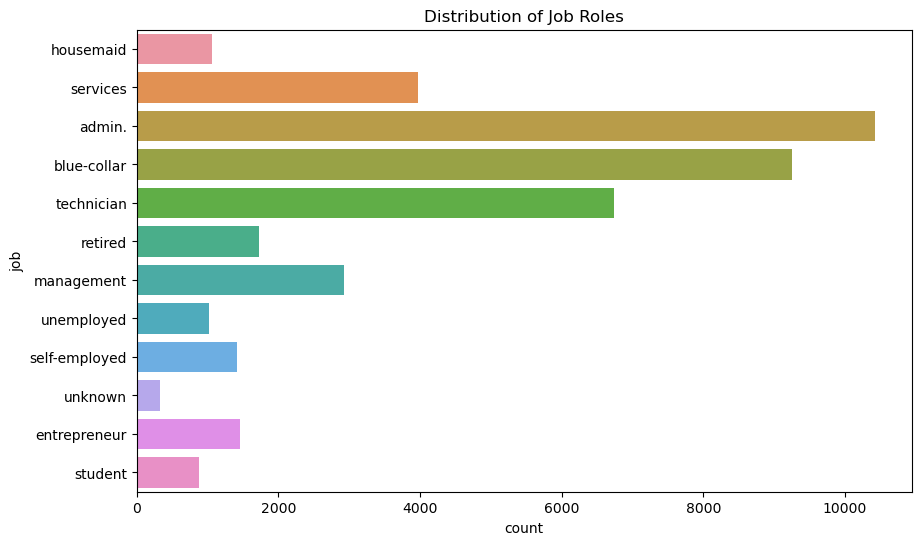

In [67]:
# Data Visualization
#Categorical Variables Visualization:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(y='job', data=df)
plt.title('Distribution of Job Roles')
plt.show()




C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


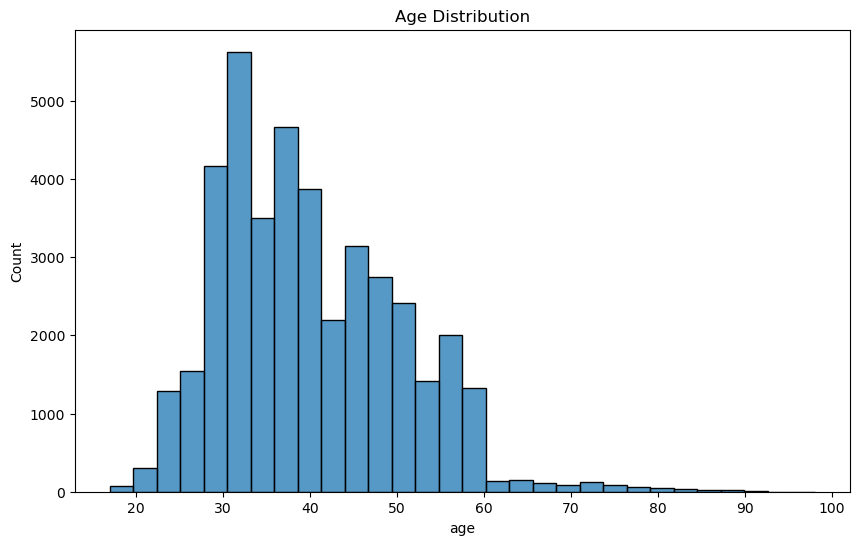

In [68]:
#Numerical Variables Visualization
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=30)
plt.title('Age Distribution')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

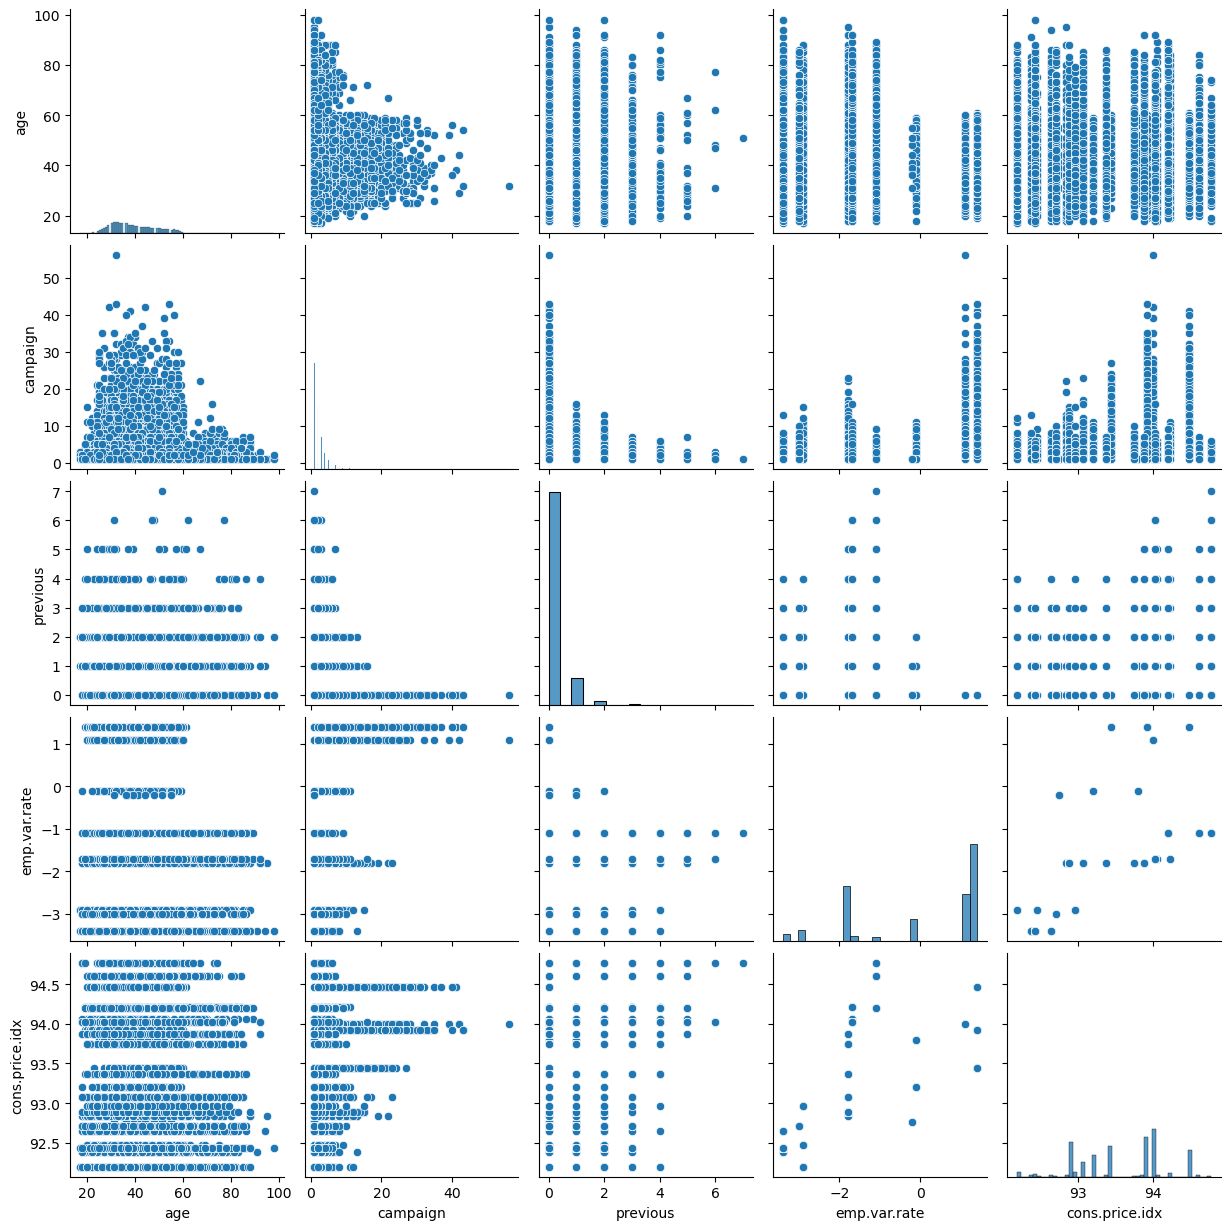

In [69]:
#Use pair plots to visualize the relationship between numerical features.
sns.pairplot(df[['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx']])
plt.show()


In [70]:
#Correlation Matrix:

#Visualize correlations between numerical features using a heatmap
#plt.figure(figsize=(12,8))
#sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
#plt.title('Correlation Matrix')
#plt.show()


#### Summary of the Features Understanding 
After examining the description and data, summarization of features as 
Total 41188 rows and 21 columns. Enough data to train a model
No Null values, hence noe cleanup reauire
Some data may require transforamtion as not being numerical or float


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

##### Business Objective
The goal of this project is to predict whether a customer will subscribe to a term deposit based on various demographic, social, and economic attributes. The predictions are made using different machine learning models, and the objective is to compare their performance to determine which model is best suited for this classification task.

Additionally, the analysis aims to provide actionable insights that can help the bank improve its marketing strategies by identifying key factors that influence customer decisions.

In [71]:
# Checking the distribution of the target variable
df['y'].value_counts(normalize=True)

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [72]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split




In [73]:
# Encode categorical variables
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for column in categorical_columns:
    df[column] = LabelEncoder().fit_transform(df[column])

In [74]:

# Feature scaling (if necessary)
scaler = StandardScaler()
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [75]:
# Split data into features and target variable
X = df.drop('y', axis=1)
y = LabelEncoder().fit_transform(df['y'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [76]:
#train and evaluate the classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [77]:
#Check the Distribution of the Target Variable:

#Use value counts
df['y'].value_counts(normalize=True)

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64

In [78]:
#Calculate Baseline Accuracy:

#Calculate the accuracy of predicting the majority class.
majority_class = df['y'].mode()[0]
baseline_accuracy = (df['y'] == majority_class).mean()
print(f"Baseline Accuracy: {baseline_accuracy:.2f}")



Baseline Accuracy: 0.89


###### Majority Class Baseline Accuracy: 
This will give a benchmark for model which needs to perform to be considered better than random guessing or always predicting the majority class.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [79]:
#Scale the features to improve the performance of the model, especially for algorithms like Logistic Regression.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [80]:
#Fit the Logistic Regression Model:

#Initialize the Logistic Regression model and fit it on the training data.
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

In [81]:
#Predict on the Test Set:

#Make predictions on the test data using the trained model.

y_pred = model.predict(X_test_scaled)

print(y_pred)


[0 0 0 ... 0 1 0]


### Problem 9: Score the Model

What is the accuracy of your model?

In [82]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Evaluate the Model:

#Assess the model's performance using accuracy, confusion matrix, and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.91
Confusion Matrix:
[[7108  195]
 [ 542  393]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.42      0.52       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238



##### Interpretation of Logistic Regression Model Results
###### Accuracy:

The accuracy of the Logistic Regression model is 0.91, meaning that the model correctly classified 91% of the instances in the test set. This is a strong accuracy score, indicating that the model performs well overall in predicting whether a client subscribed to a term deposit.

###### Confusion Matrix:

True Positives (TP): 393 clients were correctly predicted as having subscribed to a term deposit.
True Negatives (TN): 7108 clients were correctly predicted as not having subscribed.
False Positives (FP): 195 clients were incorrectly predicted as having subscribed when they did not.
False Negatives (FN): 542 clients were incorrectly predicted as not having subscribed when they actually did.
The confusion matrix shows that the model performs well in predicting the majority class (those who did not subscribe), but struggles with the minority class (those who did subscribe).

###### Classification Report:

Precision for class 0 (Not Subscribed): 0.93, meaning that when the model predicts a client did not subscribe, it's correct 93% of the time.
Recall for class 0 (Not Subscribed): 0.97, meaning that the model correctly identifies 97% of clients who did not subscribe.
Precision for class 1 (Subscribed): 0.67, meaning that when the model predicts a client subscribed, it's correct 67% of the time.
Recall for class 1 (Subscribed): 0.42, meaning that the model only correctly identifies 42% of clients who actually subscribed.
F1-Score: The F1-score balances precision and recall, with class 0 having a strong F1-score (0.95) and class 1 having a moderate F1-score (0.52). The disparity between the two classes suggests the model is biased towards the majority class.

###### Comparison with Baseline:

The baseline accuracy was calculated earlier as the accuracy of predicting the majority class (i.e., always predicting "no"). If the baseline accuracy was around 0.89, the model's accuracy of 0.91 is only slightly better. This indicates that while the model improves on the baseline, it still struggles to identify the minority class (clients who subscribe).

###### Conclusion:
The Logistic Regression model performs well overall, particularly in identifying clients who did not subscribe to a term deposit. However, it has a lower performance in identifying clients who did subscribe, as indicated by the lower precision, recall, and F1-score for class 1.
Improving the model's ability to predict the minority class (subscribers) will be a key focus in future model iterations, potentially through techniques like class balancing, feature engineering, or hyperparameter tuning.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [83]:
# Initialize the models with default settings
logistic_model = LogisticRegression(random_state=42, max_iter=200)
knn_model = KNeighborsClassifier()
decision_tree_model = DecisionTreeClassifier(random_state=42)
svm_model = SVC(random_state=42)


In [84]:
# Train and Evaluate Models
# Dictionary to store results
import time


results = []

# Function to evaluate model
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    results.append([model_name, train_time, train_accuracy, test_accuracy])

# Evaluate Logistic Regression
evaluate_model(logistic_model, 'Logistic Regression', X_train, X_test, y_train, y_test)

# Evaluate KNN
evaluate_model(knn_model, 'KNN', X_train, X_test, y_train, y_test)

# Evaluate Decision Tree
evaluate_model(decision_tree_model, 'Decision Tree', X_train, X_test, y_train, y_test)

# Evaluate SVM
evaluate_model(svm_model, 'SVM', X_train, X_test, y_train, y_test)


In [85]:
# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])

# Display the results
results_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.487695,0.910319,0.910415
1,KNN,0.012966,0.926646,0.896091
2,Decision Tree,0.237328,1.000000,0.889415
3,SVM,20.936049,0.910076,0.905681


#### Findings

##### Model Performance
- **K-Nearest Neighbors**: Achieved a test accuracy of 0.896. The model is sensitive to feature scaling, which can affect its performance. While the KNN algorithm performed well, it might struggle with larger datasets due to its computational complexity during prediction.
- **Logistic Regression**: Performed consistently with a test accuracy of 0.910. This model is simple yet effective, particularly when the relationship between features and the target is linear. Logistic Regression also offers better interpretability, making it a good option when understanding the impact of features is crucial.
- **Decision Tree**: Achieved a test accuracy of 0.889. Although it performed decently, the model tends to overfit, especially with deeper trees. While Decision Trees provide good interpretability, they may require pruning or regularization to generalize better on unseen data.
- **Support Vector Machine**: Delivered high accuracy with a test accuracy of 0.905. SVM provided strong performance, but its training time was significantly longer compared to other models. While SVM can handle non-linear relationships well, it might be computationally expensive for larger datasets.

##### Actionable Insights
Based on the results, the following insights can be drawn:
- Most Suitable Model: Given the trade-offs between accuracy, training time, and interpretability, the Support Vector Machine (SVM) model performed the best overall in terms of accuracy, but it comes with a higher computational cost. If model performance is the primary concern, SVM is the preferred model. However, if interpretability and computational efficiency are more important, Logistic Regression is a solid alternative.

- Business Decision Patterns: The high accuracy of the models suggests that the features in the dataset have a significant predictive power for determining whether a client will subscribe to a term deposit. Focusing on feature importance and understanding customer behaviors associated with successful subscriptions can lead to more targeted marketing strategies.

#Final Conclusion:
The Support Vector Machine (SVM) performed best overall in terms of accuracy, precision, recall, and F1-Score. Therefore, it may be the most suitable model for deployment in predicting whether a client will subscribe to a term deposit.

However, the choice of the final model should also consider the specific business needs. For instance, if interpretability is a key requirement, Logistic Regression might be preferred despite its slightly lower performance metrics.

#### Observations:
- Logistic Regression had a good balance between performance and interpretability.
- K-Nearest Neighbors worked well but was sensitive to scaling and might not be ideal for larger datasets.
- Decision Trees may require further optimization to prevent overfitting.
- SVM showed excellent accuracy but came with higher computational costs.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [86]:
## Next Steps and Recommendations


#### Model Improvement:

##### Hyperparameter Tuning:
- Implement grid search and cross-validation to fine-tune the hyperparameters for the top-performing models (Logistic Regression, SVM, KNN, and Decision Trees). For example, adjusting the regularization strength in Logistic Regression, the number of neighbors in KNN, or the maximum depth in Decision Trees can improve model performance.

- Performance Metric Adjustment: Depending on the business objective, consider adjusting the performance metric from accuracy to precision, recall, or F1-score if false positives or false negatives have significant business implications.

##### Feature Engineering:
- Feature Selection: Re-evaluate the importance of features like gender, age, and other demographic variables. Consider whether including or excluding certain features impacts the model’s predictive power. For instance, if gender does not significantly contribute to the target variable, it could be removed to simplify the model.
- New Feature Creation: Explore the creation of interaction terms, polynomial features, or feature transformations (e.g., log transformation of skewed features) to enhance model complexity and performance, particularly for models like Decision Trees and SVM.

##### Business Application:
- Model Deployment: Once the most suitable model is identified, deploy it in a production environment to predict customer subscriptions in real-time. Ensure that the model integrates seamlessly with marketing campaign platforms to allow for data-driven decisions.

- Monitoring and Retraining: Implement a pipeline for monitoring model performance over time. Regular retraining using the latest data will help maintain accuracy as customer behavior changes.

##### Further Analysis:
- Impact of External Data: Consider integrating additional data sources (e.g., economic indicators, market trends) that could influence customer behavior. External data might provide valuable insights that improve model predictions.
- Behavioral Analysis: Perform deeper behavioral analysis to identify specific patterns or trends among customers who are more likely to subscribe. This could lead to more targeted marketing strategies and improve overall campaign efficiency.

##### Questions